# Regression with Python · Taxi Fares

Completed by [Anton Starshev](http://linkedin.com/in/starshev) on 15/10/2024

### Context

The data consulting firm has recently hired me as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year.

### Data

This project uses a dataset called 2017_Yellow_Taxi_Trip_Data.csv gathered by the New York Taxi and Limousine Commission (TLC). In the dataset, payment_type is encoded in integers:

1: Credit card  
2: Cash  
3: No charge  
4: Dispute  
5: Unknown  

### Execution

Throughout the project notebook, the references to the problem-solving framework PACE are used. The following notebook components are labeled with the respective PACE stages: Plan, Analyze, Construct, and Execute.

### PACE: **Plan**

Imported the packages for analysis and building linear regression model.

In [121]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [122]:
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

### PACE: **Analyze** · Data Cleaning

Started with checking the size and general info.

In [123]:
df.shape

(22699, 18)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Checked for missing data.

In [125]:
df.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Checked basic statistics of the data.

In [126]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Checked pickup & drop-off columns string formats and converted them into datetime64.

In [127]:
df['tpep_pickup_datetime'].head()

0     03/25/2017 8:55:43 AM
1     04/11/2017 2:53:28 PM
2     12/15/2017 7:26:56 AM
3     05/07/2017 1:17:59 PM
4    04/15/2017 11:32:20 PM
Name: tpep_pickup_datetime, dtype: object

In [128]:
df['tpep_dropoff_datetime'].head()

0     03/25/2017 9:09:47 AM
1     04/11/2017 3:19:58 PM
2     12/15/2017 7:34:08 AM
3     05/07/2017 1:48:14 PM
4    04/15/2017 11:49:03 PM
Name: tpep_dropoff_datetime, dtype: object

In [129]:
df['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'], 
                                             format = '%m/%d/%Y %I:%M:%S %p')
df['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'], 
                                             format = '%m/%d/%Y %I:%M:%S %p')

In [130]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [131]:
df.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

Created a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [132]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [133]:
df.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
duration                        float64
dtype: object

Сhecked the most potentially widely distributed features for outliers: `trip_distance`, `fare_amount`, `duration`.

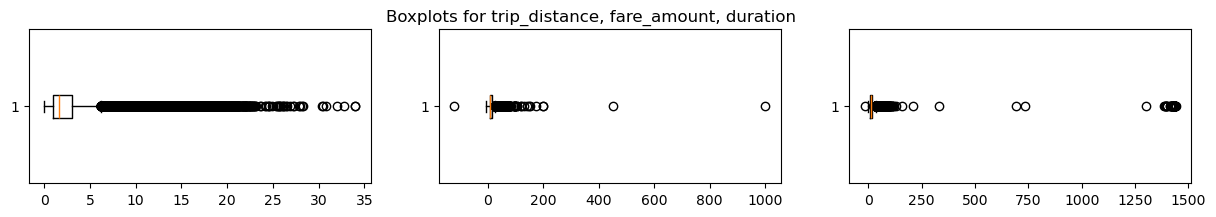

In [134]:
fig, ax = plt.subplots(1, 3, figsize = (15, 2))
fig.suptitle('Boxplots for trip_distance, fare_amount, duration')
ax[0].boxplot( data = df, x = 'trip_distance', vert = False, showfliers = True)
ax[1].boxplot( data = df, x = 'fare_amount', vert = False, showfliers = True)
ax[2].boxplot( data = df, x = 'duration', vert = False, showfliers = True);

Explored the details of `trip_distance` outliers to understand if those reflect an erroneous data, or are they very short trips that get rounded down.

In [135]:
df['trip_distance'].drop_duplicates().sort_values().head(10)

128      0.00
2985     0.01
323      0.02
3158     0.03
1510     0.04
10146    0.05
4423     0.06
922      0.07
4623     0.08
22035    0.09
Name: trip_distance, dtype: float64

It turned out that distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. To undersand the amount of such samples in data, calculated the count of rides where the `trip_distance` equals to zero.

In [136]:
df['trip_distance'].value_counts()[0.00]

148

Although 148 out of ~23,000 rides is relatively insignificant, anyway decided to erase them from the modeling process.

In [137]:
df.shape

(22699, 19)

In [138]:
indexes_to_erase = df[df['trip_distance'] == 0.00].index
df.drop(index = indexes_to_erase, inplace = True)

In [139]:
df.shape

(22551, 19)

Now checked the nature of `fare_amount` outliers.

In [140]:
df['fare_amount'].describe()

count    22551.000000
mean        12.960317
std         12.699077
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

Imputed values less than $0 with `0`.

In [141]:
df.replace(df[df['fare_amount'] < 0]['fare_amount'].tolist(), 0, inplace = True)

Imputed the outliers above the threshold of `Q3 + (6 * IQR)` = $62.5 with the threshold value.

In [142]:
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)
iqr = q3 - q1
lower = 0
upper = q3 + 6 * iqr
df['fare_amount'] = df['fare_amount'].clip(lower, upper)

Confirmed the success of adjustments.

In [143]:
df['fare_amount'].describe()

count    22551.000000
mean        12.867297
std         10.418788
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64

Researched the `duration` outliers in more detail.

In [144]:
df['duration'].describe()

count    22551.000000
mean        17.118194
std         62.185386
min        -16.983333
25%          6.716667
50%         11.233333
75%         18.450000
max       1439.550000
Name: duration, dtype: float64

Imputed all negative durations with `0`.

In [145]:
df.replace(df[df['duration'] < 0]['duration'].tolist(), 0, inplace = True)

Imputed high-end outliers for the fare rate of `Q3 + (6 * IQR)` value = 88.85 minutes

In [146]:
q1 = df['duration'].quantile(0.25)
q3 = df['duration'].quantile(0.75)
iqr = q3 - q1
lower = 0
upper = q3 + 6 * iqr
df['duration'] = df['duration'].clip(lower, upper)

Confirmed results.

In [147]:
df['duration'].describe()

count    22551.000000
mean        14.548426
std         11.934231
min          0.000000
25%          6.716667
50%         11.233333
75%         18.450000
max         88.850000
Name: duration, dtype: float64

### PACE: **Analyze** · Feature engineering

In the next step, created a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

In [148]:
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)

In [149]:
distance_means = df.groupby('pickup_dropoff')['trip_distance'].mean()
distance_means_dict = dict(zip(distance_means.index, distance_means.values))
df['mean_distance'] = df['pickup_dropoff'].map(distance_means_dict)
df.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000


Repeated the process used to create the `mean_distance` column to create a `mean_duration` column in the same technique.

In [150]:
duration_means = df.groupby('pickup_dropoff')['duration'].mean()
duration_means_dict = dict(zip(duration_means.index, duration_means.values))
df['mean_duration'] = df['pickup_dropoff'].map(duration_means_dict)
df.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667


Created two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [151]:
df['day'] = df['tpep_pickup_datetime'].dt.dayofweek
df['month'] = df['tpep_pickup_datetime'].dt.month
df.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,5,3
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,1,4
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,4,12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,6,5
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,5,4


Next, created a binary `rush_hour` column indicating rush hour time as `1` and regular time as `0`. 
Defined rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either between 06:00-10:00 or between 16:00-20:00

In [152]:
hours = df['tpep_pickup_datetime'].dt.hour.tolist()
rush_hours = []
for hour in hours:
    if (hour >= 16 and hour < 20) or (hour >= 6 and hour < 10):
        rush_hours.append(1)
    else:
        rush_hours.append(0)
df['rush_hour'] = rush_hours
df.loc[df['day'].isin([5, 6]), 'rush_hour'] = 0
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,5,3,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,1,4,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,4,12,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,6,5,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,5,4,0


### PACE: **Analyze** · Checking correlations

Created a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

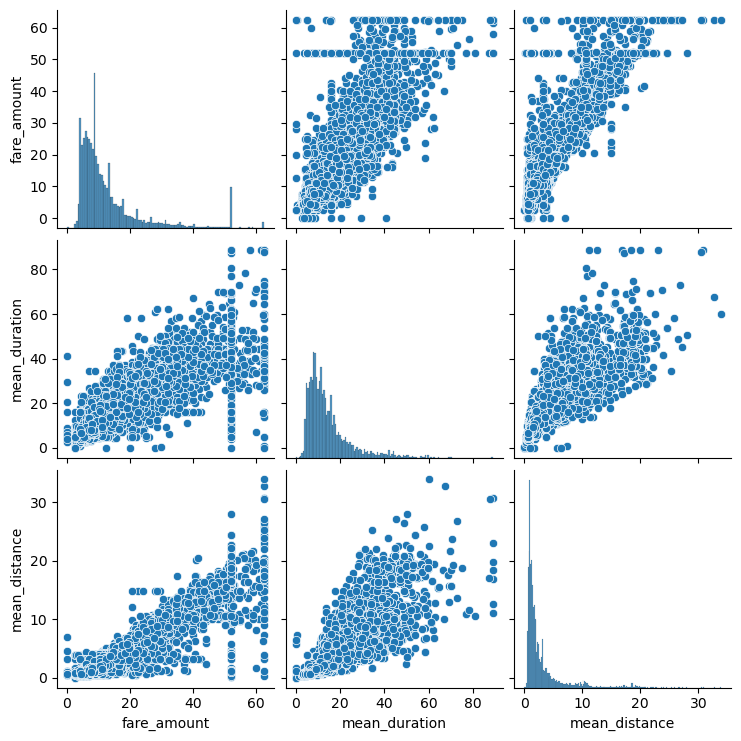

In [163]:
sns.pairplot(df[['fare_amount', 'mean_duration', 'mean_distance']]);

These variables all showed linear correlation with each other. Next, coded a correlation matrix to determine most correlated variables.

In [165]:
df[['fare_amount', 'VendorID', 'passenger_count', 'mean_distance', 'mean_duration', 'rush_hour']].corr()

,fare_amount,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
fare_amount,1.000000,-0.001505,0.015589,0.927573,0.879214,-0.018976
VendorID,-0.001505,1.000000,0.266705,0.003729,-0.000065,-0.001567
passenger_count,0.015589,0.266705,1.000000,0.012862,0.014913,-0.022216
mean_distance,0.927573,0.003729,0.012862,1.000000,0.874699,-0.039469
mean_duration,0.879214,-0.000065,0.014913,0.874699,1.000000,-0.020528
rush_hour,-0.018976,-0.001567,-0.022216,-0.039469,-0.020528,1.000000


Visualized a correlation heatmap of the data.

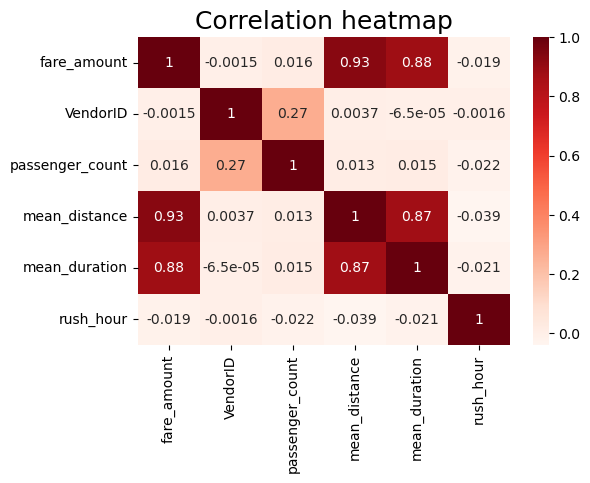

In [166]:
plt.figure(figsize = (6,4))
sns.heatmap(df[['fare_amount', 'VendorID', 'passenger_count', 'mean_distance', 'mean_duration', 'rush_hour']].corr(
    method = 'pearson'), annot = True, cmap = 'Reds')
plt.title('Correlation heatmap', fontsize = 18)
plt.show();

While `mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount`, they're also both correlated with each other, with a Pearson correlation of 0.87.

Although highly correlated predictor variables can be bad for linear regression models, they can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool for statistical inferences. This particular model is supposed to predict `fare_amount`, therefore, both variables were included even though they are correlated.

### PACE: **Construct** · Model Building

Isolated modeling variables onto `x` (predictors) and `y` (target).

In [167]:
x = df.drop(columns = ['fare_amount'])
y = df[['fare_amount']]

Dropped features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [168]:
x = x[['VendorID', 'passenger_count', 'mean_distance', 'mean_duration', 'rush_hour']]
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22551 entries, 0 to 22698
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22551 non-null  int64  
 1   passenger_count  22551 non-null  int64  
 2   mean_distance    22551 non-null  float64
 3   mean_duration    22551 non-null  float64
 4   rush_hour        22551 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.0 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [169]:
x.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [170]:
y.head()

,fare_amount
0,13.0
1,16.0
2,6.5
3,20.5
4,16.5


Dummy encoded categorical variable.

In [171]:
x['VendorID'] = x['VendorID'].astype(str)
x = pd.get_dummies(x, drop_first = True)
x.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,True
1,1,3.108889,24.470370,0,False
2,1,0.881429,7.250000,1,False
3,1,3.700000,30.250000,0,True
4,1,4.435000,14.616667,0,True


In [172]:
x['VendorID_2'] = x['VendorID_2'].astype(int)
x.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


Created training and testing sets with 80/20 proportion.

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Standardized the data.

In [177]:
x_train_std = pd.DataFrame(StandardScaler().fit_transform(x_train), columns = x.columns)
x_train_std

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.274766,-0.189339,-0.121920,-0.652063,0.894249
1,0.274766,-0.167530,-0.392002,-0.652063,0.894249
2,-0.499610,-0.209991,-0.179272,-0.652063,-1.118257
3,0.274766,-0.446667,-0.053530,1.533595,0.894249
4,1.049143,-0.404528,0.099063,-0.652063,0.894249
...,...,...,...,...,...
18035,0.274766,-0.187158,0.294013,1.533595,0.894249
18036,-0.499610,0.649131,0.007074,-0.652063,0.894249
18037,-0.499610,-0.641404,-0.979845,-0.652063,0.894249
18038,0.274766,-0.366996,0.108117,1.533595,-1.118257


Instantiated the model and fitted it to the training data.

In [178]:
model = LinearRegression()
model.fit(x_train_std, y_train)

LinearRegression()

### PACE: **Construct** · Model Evaluation

Scaled the `x_test` data and obtained predictions on the test dataset.

In [180]:
x_test_std = pd.DataFrame(StandardScaler().fit_transform(x_test), columns = x.columns)
predictions = model.predict(x_test_std)

Evaluated the model performance on the testing data.

In [214]:
print('R-SQUARED: ', model.score(x_test_std, y_test))
print('MSE: ', mean_squared_error(y_test, predictions))
print('MAE: ', mean_absolute_error(y_test, predictions))
print('Std(y_test): ', np.std(y_test.values))

R-SQUARED:  0.872266355867671
MSE:  13.434891299521253
MAE:  2.0454995530282996
Std(y_test):  10.255679193261148


**Observation:** The model performance is high on the test set, suggesting that there is little bias in the model and that the model is not overfitted. For the test data, an R2 of 0.872 means that 87.2% of the variance in the `fare_amount` variable is described by the model. The mean absolute error is around 5 times less than the standard deviation of the `fare_amount` variable, which indicates the high efficiency of the model.

### PACE: **Execute**

Stored `actual`,`predictions` and `residuals` for the testing set as columns in a `results` dataframe.

In [198]:
results = pd.DataFrame(data = {'actual' : y_test['fare_amount'], 'predictions' : predictions.flatten()})
results['residuals'] = results['actual'] - results['predictions']
results.head()

,actual,predictions,residuals
8855,14.0,13.068670,0.931330
5854,19.0,19.317937,-0.317937
1397,17.5,19.175225,-1.675225
1664,4.5,6.749741,-2.249741
17035,11.0,10.114415,0.885585


Created a scatterplot to visualize `actual` vs. `predictions`.

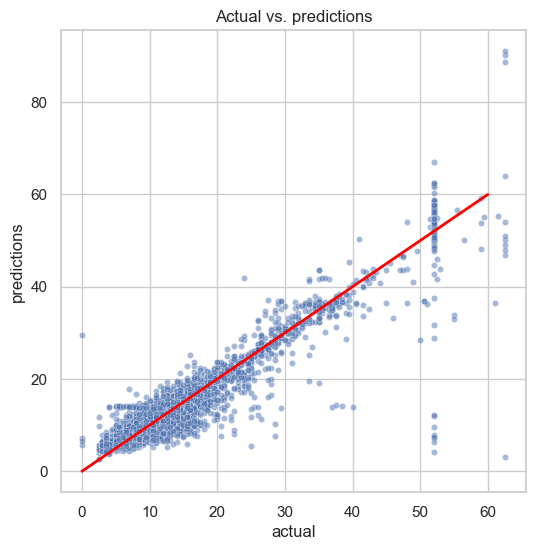

In [206]:
fig, ax = plt.subplots(figsize = (6, 6))
sns.scatterplot(x = 'actual', y = 'predictions', data = results, s = 20, alpha = 0.5, ax = ax)
plt.plot([0,60], [0,60], c = 'red', linewidth = 2)
plt.title('Actual vs. predictions');

Visualize the distribution of the `residuals` using a histogram.

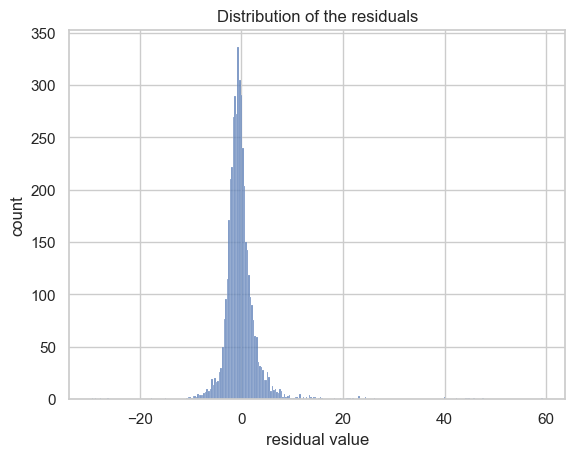

In [208]:
sns.histplot(results['residuals'])
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

**Observation:** Distribution of the residuals is approximately normal and demonstrates that the model's errors are evenly distributed and unbiased.

Created a scatterplot of `residuals` over `predictions`.

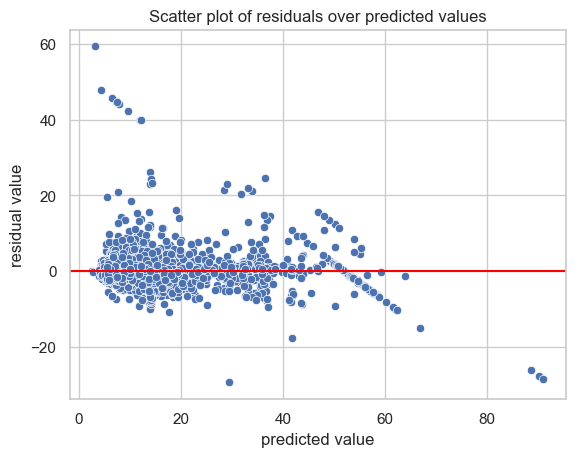

In [211]:
sns.scatterplot(x = 'predictions', y = 'residuals', data = results)
plt.axhline(0, c = 'red')
plt.title('Scatter plot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show();

**Observation:** The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which could probably indicate the imputed maximum of $62.50 for outliers, as well as some most frequently received tariff above the bulk of the records (f.e. for airport trips, etc.)

**Summary:** The detailed modeling report is presented in a separate PDF document, please check the project folder.

### Acknowledgment

I would like to express gratitude to Google and Coursera for supporting the educational process and providing the opportunity to refine and showcase skills acquired during the courses by completing real-life scenario portfolio projects, such as this.

### Reference

This is a workplace scenario project proposed within the syllabus of Google Advanced Data Analytics Professional Certificate on Coursera.